In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sl
import seaborn as sns

In [9]:
data = pd.read_csv("city_day.csv")

In [10]:
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [11]:
data.shape

(29531, 16)

In [12]:
cities = data['City'].value_counts()  
print(f'Total number of cities in the dataset : {len(cities)}')
print(cities)

Total number of cities in the dataset : 26
City
Ahmedabad             2009
Delhi                 2009
Mumbai                2009
Bengaluru             2009
Lucknow               2009
Chennai               2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Ernakulam              162
Kochi                  162
Aizawl                 113
Name: count, dtype: int64


In [13]:
data.info

<bound method DataFrame.info of                 City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Be

In [14]:
data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [15]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [16]:
data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

<Axes: >

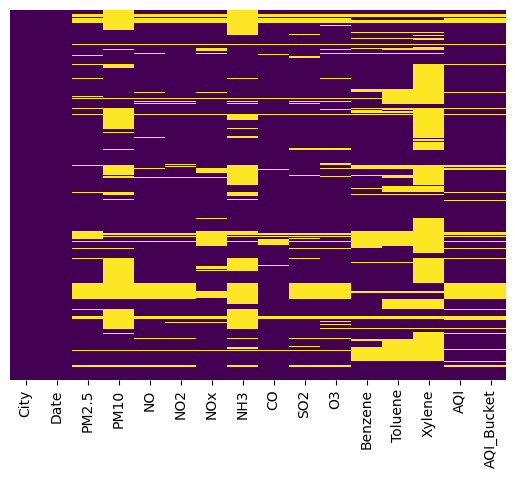

In [17]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
(data.isnull().sum()/data.shape[0]*100).sort_values(ascending=False)

Xylene        61.322001
PM10          37.723071
NH3           34.973418
Toluene       27.229014
Benzene       19.041008
AQI           15.851139
AQI_Bucket    15.851139
PM2.5         15.570079
NOx           14.171549
O3            13.619586
SO2           13.050692
NO2           12.139785
NO            12.129626
CO             6.972334
City           0.000000
Date           0.000000
dtype: float64

Text(0, 0.5, 'PM10')

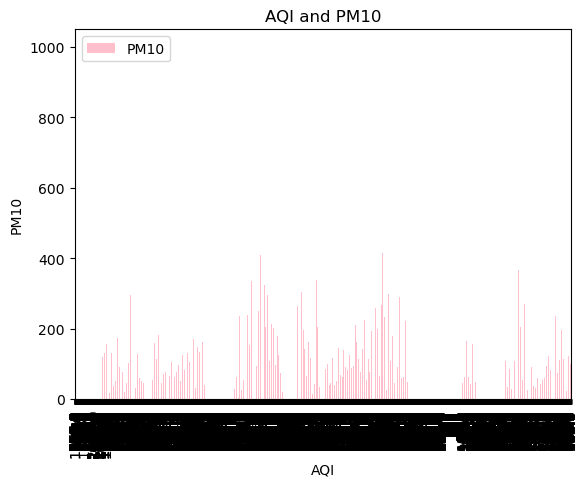

In [19]:
data.plot(kind='bar',x='AQI',y='PM10',color='pink');
plt.title('AQI and PM10')
plt.xlabel("AQI")
plt.ylabel("PM10")

Text(0, 0.5, 'PM2.5')

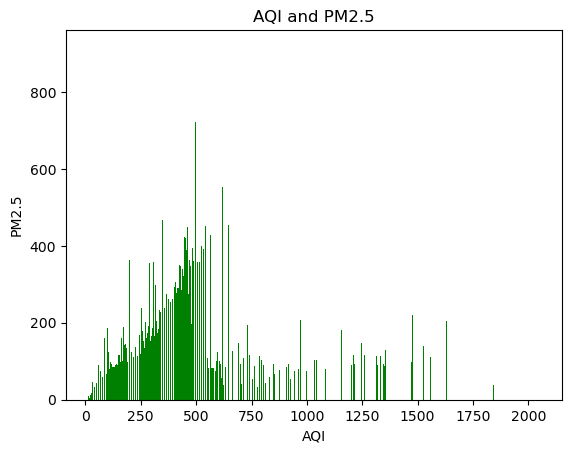

In [20]:
x=data['AQI']
y=data['PM2.5']
plt.bar(x,y,color='green')
plt.title('AQI and PM2.5')
plt.xlabel("AQI")
plt.ylabel("PM2.5")

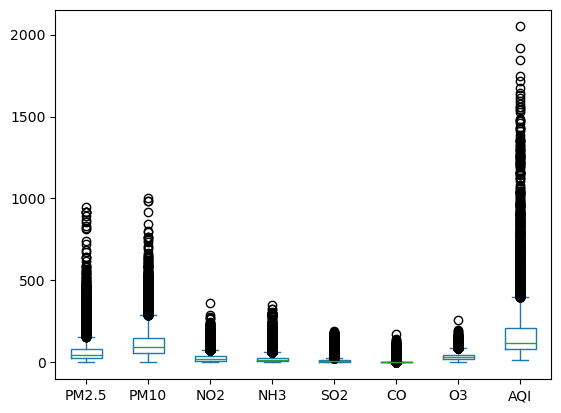

In [21]:
data.plot(kind='box',y=['PM2.5','PM10','NO2','NH3','SO2','CO','O3','AQI']);

In [22]:
change_satis = {"AQI_Bucket": { "satisfactory": "Satisfactory"}}
data=data.replace(change_satis)

<Axes: ylabel='PM2.5'>

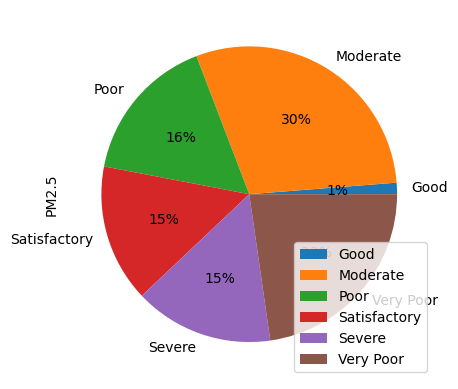

In [23]:
data.groupby(['AQI_Bucket']).sum().plot(kind='pie', y='PM2.5',autopct='%1.0f%%')

## Finding categorical and continuous attribute

In [25]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)
cate_val

['AQI_Bucket']

In [26]:
cont_val

['City',
 'Date',
 'PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene',
 'AQI']

## Data Preprocessing

In [28]:
data2 = data.copy()

#### replacing null values with mean

In [30]:
data2 = data2.fillna(data2.mean(numeric_only=True))

In [31]:
data2

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581,NaN
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581,NaN
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581,NaN
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581,NaN
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000,Good
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000,Satisfactory
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000,Satisfactory
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000,Satisfactory


<Axes: >

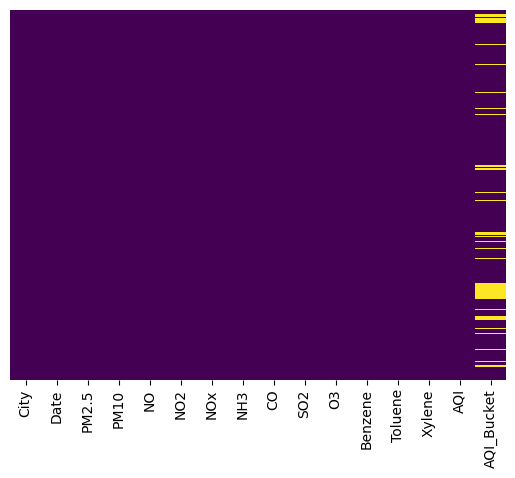

In [32]:
sns.heatmap(data2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [34]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       29531 non-null  float64
 3   PM10        29531 non-null  float64
 4   NO          29531 non-null  float64
 5   NO2         29531 non-null  float64
 6   NOx         29531 non-null  float64
 7   NH3         29531 non-null  float64
 8   CO          29531 non-null  float64
 9   SO2         29531 non-null  float64
 10  O3          29531 non-null  float64
 11  Benzene     29531 non-null  float64
 12  Toluene     29531 non-null  float64
 13  Xylene      29531 non-null  float64
 14  AQI         29531 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


###  Encoding categorical values

In [37]:
dist=(data2['City'])
distset=set(dist)
dd=list(distset)
dictofwords={dd[i] : i for i in range(0, len(dd))}
data2['City']=data2['City'].map(dictofwords)

In [40]:
dist=(data2['AQI_Bucket'])
distset=set(dist)
dd=list(distset)
dictofwords={dd[i] : i for i in range(0, len(dd))}
data2['AQI_Bucket']=data2['AQI_Bucket'].map(dictofwords)

In [44]:
data2

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,8,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581,1
1,8,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581,1
2,8,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581,1
3,8,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581,1
4,8,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000,2
29527,15,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000,5
29528,15,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000,5
29529,15,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000,5


In [45]:
data2.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [46]:
del(data2['AQI_Bucket'])

### correlation

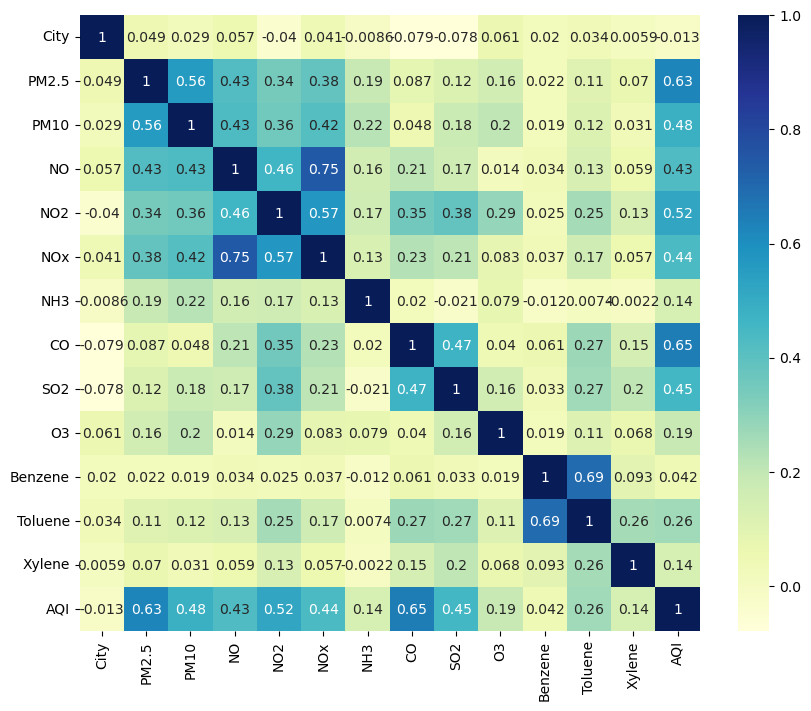

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
numeric_data = data2.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.show()

<Figure size 1800x1800 with 0 Axes>

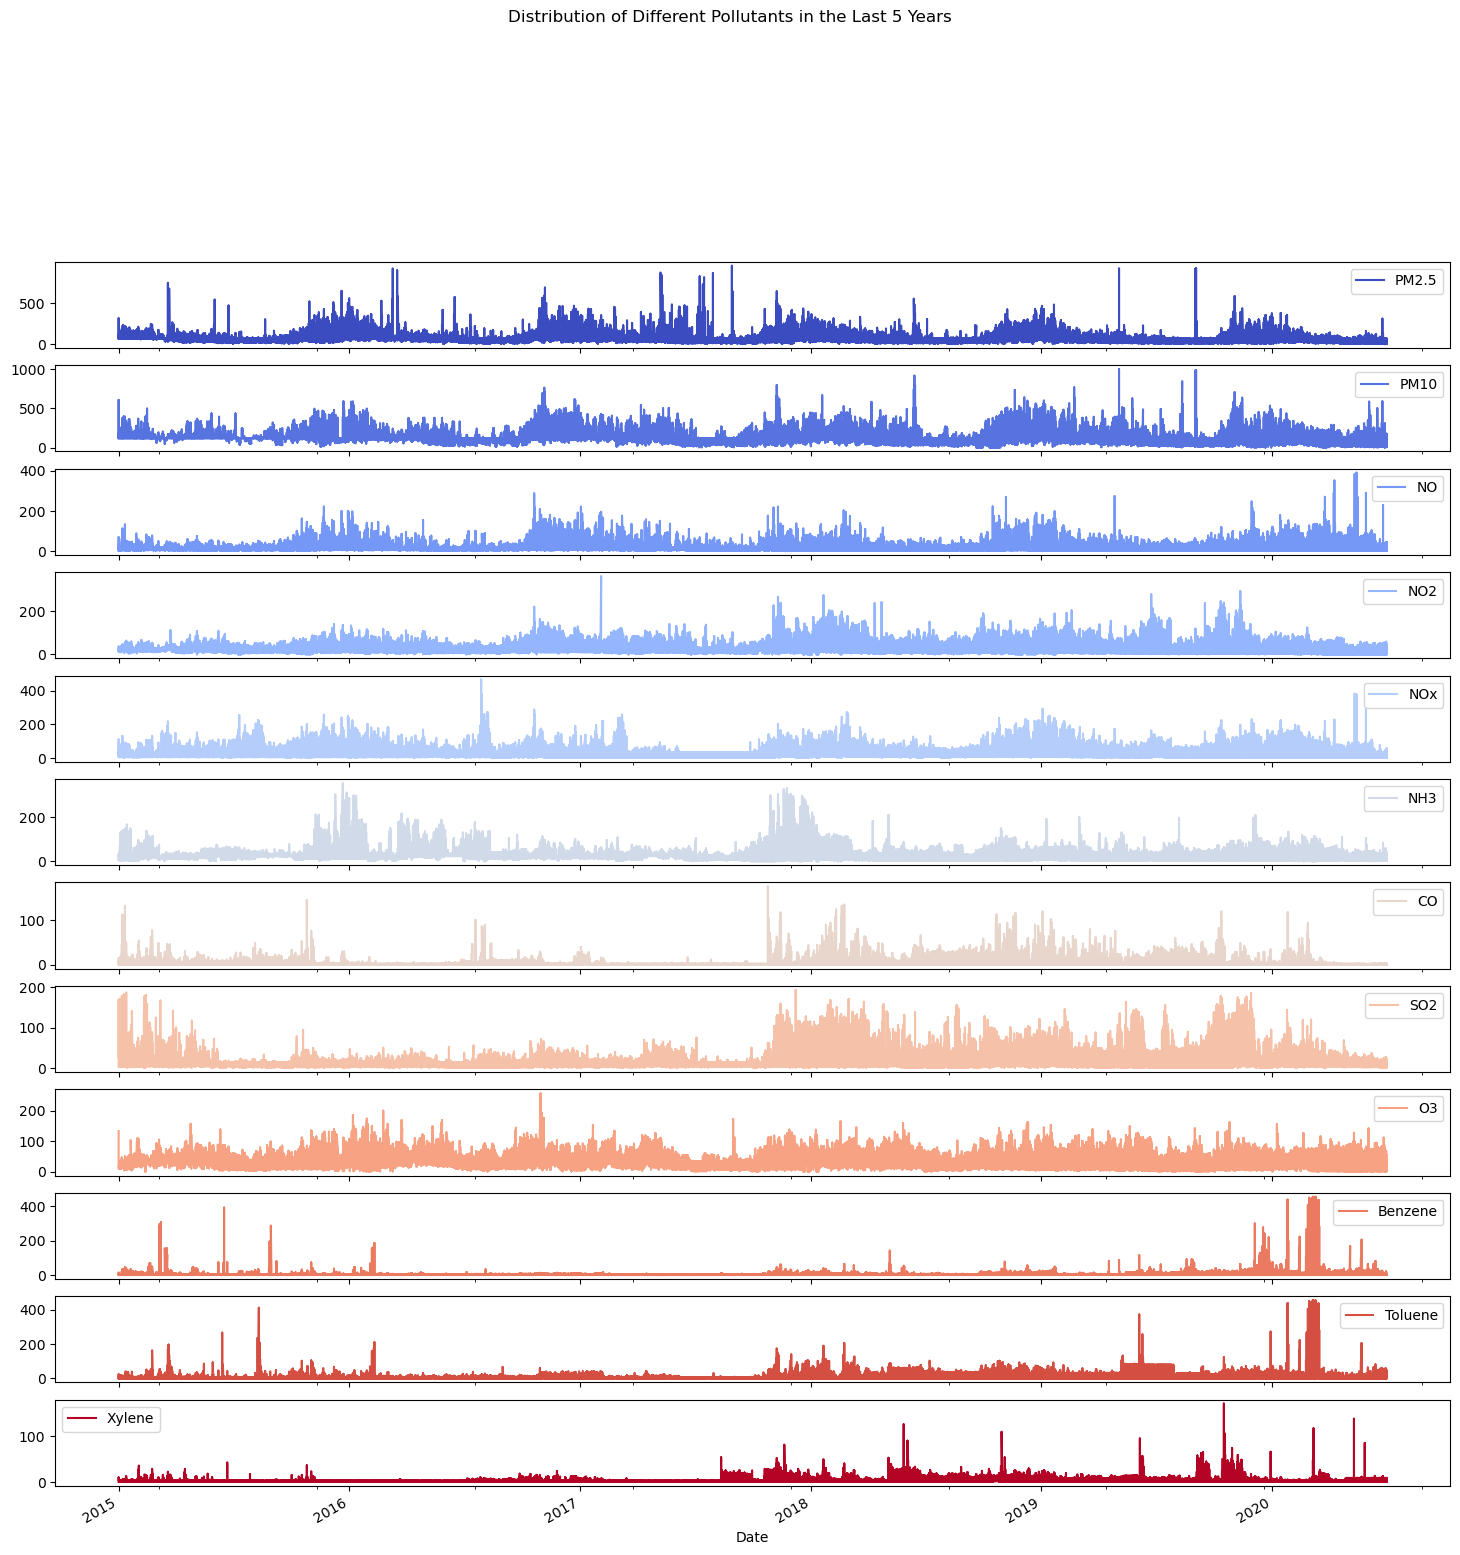

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data2' is your DataFrame with columns 'Date' and pollutants
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# Create a copy of 'data2'
data2_copy = data2.copy()

# Assuming 'Date' is in datetime format
data2_copy['Date'] = pd.to_datetime(data2_copy['Date'])
data2_copy['Year'] = data2_copy['Date'].dt.year

# Set 'Date' as the index
data2_copy.set_index('Date', inplace=True)

# Extracting data for the last 5 years
data2_last_five_years = data2_copy[data2_copy['Year'] >= (data2_copy['Year'].max() - 5)]

# Selecting only the pollutants for the last 5 years
data2_five = data2_last_five_years[pollutants]

# Plotting the distribution of different pollutants in the last 5 years
plt.figure(figsize=(18, 18))
data2_five.plot(kind='line', figsize=(18, 18), cmap='coolwarm', subplots=True, fontsize=10)
plt.suptitle('Distribution of Different Pollutants in the Last 5 Years', y=1.02)
plt.show()


In [54]:
aqi_bins = [0,50,100,200,300,400,500]
aqi_labels = ["Good", "Satisfactory", "Moderate", "Poor","Very Poor","Severe"]
data2['AQIc'] = pd.cut(data2['AQI'], aqi_bins, labels=aqi_labels, 
    right=True, include_lowest=True)
data2


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQIc
0,8,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581,Moderate
1,8,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581,Moderate
2,8,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581,Moderate
3,8,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581,Moderate
4,8,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000,Good
29527,15,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000,Satisfactory
29528,15,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000,Satisfactory
29529,15,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000,Satisfactory


###  features selection (remove unwanted columns)

In [56]:
unwanted_columns = ['AQI', 'Date','City','Benzene','Toluene','Xylene'] 
data2 = data2.drop(columns=unwanted_columns)

In [57]:
data2.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'AQIc'], dtype='object')

###  Splitting the data into train and test data

In [59]:
features=data2.drop(['AQIc'], axis=1)
labels=data2['AQIc']

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size=0.2,random_state=2)

In [61]:
X_train

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3
12204,24.620000,66.660000,5.14000,19.020000,14.690000,32.190000,0.770000,9.950000,47.48000
15181,67.450578,118.127103,17.57473,28.560659,0.000000,23.483476,0.000000,14.531977,34.49143
26039,67.450578,118.127103,17.57473,28.560659,32.309123,23.483476,1.680000,14.531977,0.15000
27599,31.390000,62.210000,0.89000,7.050000,4.350000,3.410000,0.890000,7.400000,45.72000
7410,67.450578,53.240000,7.99000,18.000000,18.450000,99.300000,0.050000,5.820000,45.15000
...,...,...,...,...,...,...,...,...,...
18898,143.850000,201.760000,48.81000,26.940000,52.080000,2.880000,1.570000,23.250000,15.50000
11798,71.620000,155.390000,26.94000,47.560000,49.150000,29.850000,1.240000,21.220000,45.45000
6637,67.450578,118.127103,17.57473,28.560659,32.309123,23.483476,2.248598,14.531977,34.49143
2575,30.320000,66.400000,7.19000,15.260000,14.040000,9.840000,0.580000,10.500000,24.21000


In [62]:
X_test

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3
787,67.450578,118.127103,17.57473,28.560659,32.309123,23.483476,2.248598,14.531977,34.49143
15544,23.630000,60.910000,6.70000,17.430000,7.090000,5.140000,0.210000,4.590000,31.39000
17429,35.310000,73.740000,6.87000,28.170000,28.260000,29.620000,0.710000,11.800000,45.97000
3289,65.440000,188.360000,9.32000,8.570000,32.309123,23.483476,0.320000,5.520000,19.13000
19763,19.110000,37.800000,4.27000,9.240000,13.560000,15.460000,0.380000,8.230000,51.65000
...,...,...,...,...,...,...,...,...,...
6395,82.890000,138.040000,7.56000,56.510000,36.290000,23.100000,1.050000,7.820000,46.45000
11914,21.680000,56.180000,17.85000,27.120000,32.070000,29.250000,1.100000,8.370000,20.73000
4906,37.350000,59.380000,3.16000,20.080000,1.910000,40.420000,0.380000,2.330000,22.29000
6388,114.080000,233.120000,9.05000,75.670000,47.610000,22.640000,1.430000,17.540000,65.67000


In [63]:
y_train

12204        Moderate
15181        Moderate
26039        Moderate
27599    Satisfactory
7410     Satisfactory
             ...     
18898            Poor
11798        Moderate
6637         Moderate
2575     Satisfactory
23720        Moderate
Name: AQIc, Length: 23624, dtype: category
Categories (6, object): ['Good' < 'Satisfactory' < 'Moderate' < 'Poor' < 'Very Poor' < 'Severe']

In [64]:
y_test

787          Moderate
15544    Satisfactory
17429    Satisfactory
3289             Poor
19763    Satisfactory
             ...     
6395             Poor
11914    Satisfactory
4906     Satisfactory
6388             Poor
25550            Poor
Name: AQIc, Length: 5907, dtype: category
Categories (6, object): ['Good' < 'Satisfactory' < 'Moderate' < 'Poor' < 'Very Poor' < 'Severe']

## KNN

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)


y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


ValueError: Input contains NaN

### checked for NaN values

In [102]:
print(data2['AQIc'].isnull().sum())


543


In [105]:
data2 = data2.dropna(subset=['AQIc'])


In [107]:
print(data2.isnull().sum())


PM2.5    0
PM10     0
NO       0
NO2      0
NOx      0
NH3      0
CO       0
SO2      0
O3       0
AQIc     0
dtype: int64


Good to go!

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = data2.drop(['AQIc'], axis=1)
y = data2['AQIc']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7719903414970679


In [145]:
 from sklearn.metrics import confusion_matrix, classification_report
 print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Good       0.62      0.62      0.62       257
    Moderate       0.82      0.83      0.82      2650
        Poor       0.67      0.52      0.59       541
Satisfactory       0.76      0.81      0.79      1728
      Severe       0.71      0.60      0.65       170
   Very Poor       0.72      0.75      0.74       452

    accuracy                           0.77      5798
   macro avg       0.72      0.69      0.70      5798
weighted avg       0.77      0.77      0.77      5798



In [147]:
acc=accuracy_score(y_test,y_pred)
per=acc*100
print(per)

77.19903414970679


### Decision Tree

In [184]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred2 = decision_tree.predict(X_val)


accuracy = accuracy_score(y_val, y_pred2)
print("Validation Accuracy:", accuracy)


Validation Accuracy: 0.74


In [186]:
from sklearn.metrics import confusion_matrix, classification_report

decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred2 = decision_tree.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred2))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred2))


Classification Report:
              precision    recall  f1-score   support

        Good       0.55      0.57      0.56       257
    Moderate       0.78      0.80      0.79      2650
        Poor       0.54      0.53      0.54       541
Satisfactory       0.74      0.72      0.73      1728
      Severe       0.65      0.58      0.61       170
   Very Poor       0.65      0.70      0.67       452

    accuracy                           0.72      5798
   macro avg       0.65      0.65      0.65      5798
weighted avg       0.72      0.72      0.72      5798

Confusion Matrix:
[[ 146   21    0   90    0    0]
 [  28 2119  151  323    5   24]
 [   2  157  286   11    3   82]
 [  91  387   13 1236    0    1]
 [   0    9    1    0   99   61]
 [   0   15   76    0   46  315]]


In [188]:
acc=accuracy_score(y_test,y_pred2)
per2=acc*100
print(per2)

72.45601931700585


In [155]:
 final_data = pd.DataFrame({'MODELS':['KNN','DT'], 
'ACCURACY':[per, per2]})

In [157]:
 final_data

,MODELS,ACCURACY
0,KNN,77.199034
1,DT,74.042773


In [192]:

# Example new data for prediction
new_data_for_prediction = np.array([
    [463, 454, 78, 5, 29, 102, 18, 23, 2], 
])

# Make predictions using Decision Tree
prediction = decision_tree.predict(new_data_for_prediction)

# Display the prediction
print("Prediction:")
print(prediction)


Prediction:
['Severe']


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
